In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [3]:
data = pd.read_csv("HP_train.csv")
df = pd.DataFrame(data)

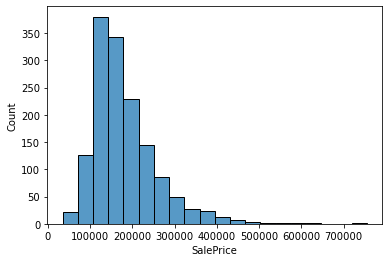

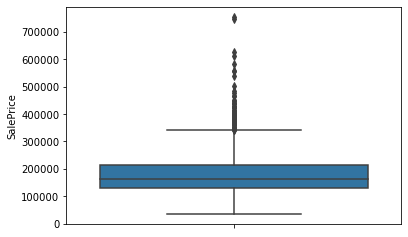

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
saleprice = df["SalePrice"]

sns.histplot(saleprice, bins = 20);
plt.show()
sns.boxplot(y=saleprice, data = df, orient = "v");
plt.show()
saleprice.describe()

### Investigate missing data and outliers

In [5]:
saleprice.isna().sum()

0

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
nulls = df.isna().sum()
print(nulls[nulls != 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [7]:
dfwpool = df[df["PoolArea"] > 0]
x = len(df)-len(dfwpool)
print(x)
dfwgarage = df[df["GarageArea"] > 0]
x = len(df)-len(dfwgarage)
print(x)
dfnobasement = df[df["TotalBsmtSF"] == 0]
print(len(dfnobasement))
dfwfireplace = df[df["Fireplaces"] > 0]
x = len(df)-len(dfwfireplace)
print(x)

1453
81
37
690


In [8]:
highsaledf = df[df["SalePrice"] >= 400000]
print(len(highsaledf))
nulls = highsaledf.isna().sum()
print(nulls[nulls != 0])

28
LotFrontage     2
Alley          28
MasVnrType      1
MasVnrArea      1
PoolQC         27
Fence          26
MiscFeature    28
dtype: int64


In [9]:
print(len(highsaledf)/len(df))
highsaledf['SalePrice'].describe()

0.019178082191780823


count        28.000000
mean     490220.785714
std       97759.502547
min      402000.000000
25%      424402.500000
50%      449105.500000
75%      542250.000000
max      755000.000000
Name: SalePrice, dtype: float64

9.107142857142858


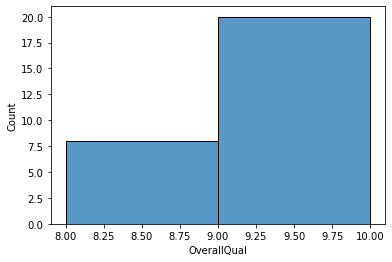

In [10]:
z = highsaledf["OverallQual"]
print(highsaledf["OverallQual"].mean())
sns.histplot(z, bins = 2);
plt.show()

6.0993150684931505


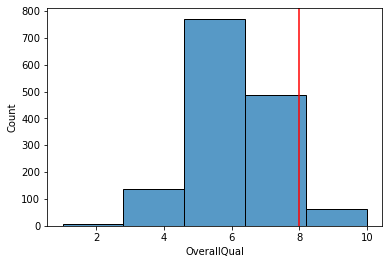

In [11]:
print(df["OverallQual"].mean())
overallquality = df["OverallQual"]
y = highsaledf["OverallQual"].min()
sns.histplot(overallquality, bins = 5);
plt.axvline(y, color = "red")
plt.show()

1970.857142857143


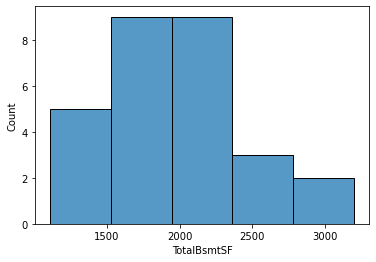

In [12]:
print(highsaledf["TotalBsmtSF"].mean())
z = highsaledf["TotalBsmtSF"]
sns.histplot(z, bins = 5);
plt.show()

1057.4294520547944


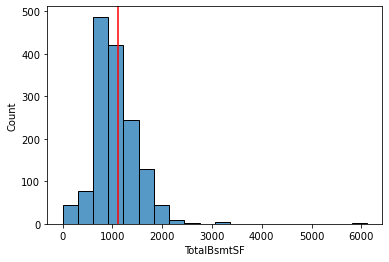

In [13]:
print(df["TotalBsmtSF"].mean())
basementsqft = df["TotalBsmtSF"]
y = highsaledf["TotalBsmtSF"].min()
sns.histplot(basementsqft, bins = 20);
plt.axvline(y, color = "red")
plt.show()

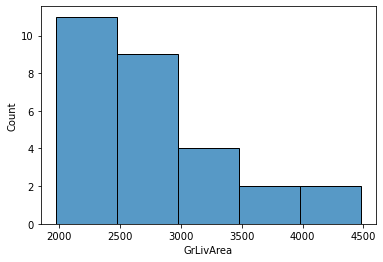

In [14]:
highsaledf["GrLivArea"].mean()
z = highsaledf["GrLivArea"]
sns.histplot(z, bins = 5);
plt.show()

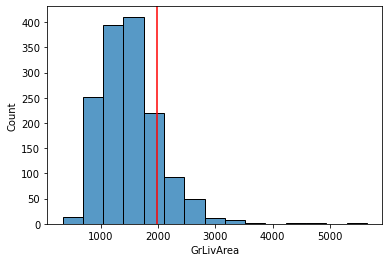

In [15]:
df["GrLivArea"].mean()
y = highsaledf["GrLivArea"].min()
abovegroundarea = df["GrLivArea"]
sns.histplot(abovegroundarea, bins = 15);
plt.axvline(y, color = "red")
plt.show()

824.25


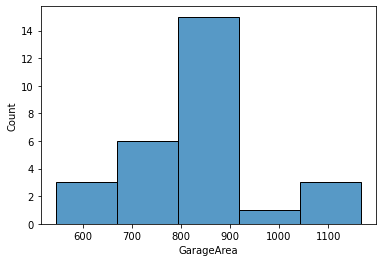

In [16]:
print(highsaledf["GarageArea"].mean())
z = highsaledf["GarageArea"]
sns.histplot(z, bins = 5);
plt.show()

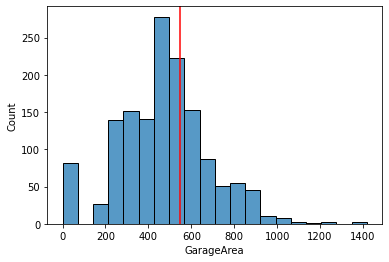

In [17]:
df["GarageArea"].mean()
y = highsaledf["GarageArea"].min()
garagearea = df["GarageArea"]
sns.histplot(garagearea, bins = 20);
plt.axvline(y, color = "red")
plt.show()

### Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

0.6135805515591954
9.484229391500089e-152


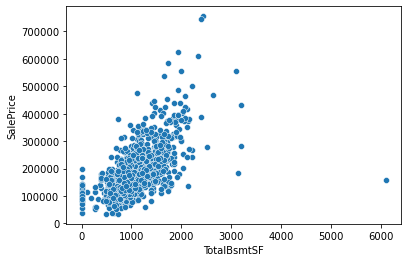

In [18]:
sns.scatterplot(x = basementsqft, y = saleprice, data = df);
basementresults = scipy.stats.linregress(basementsqft, saleprice)
print(basementresults.rvalue)
print(basementresults.pvalue)

0.7086244776126522
4.518033646776791e-223


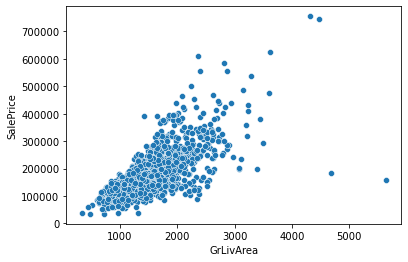

In [19]:
sns.scatterplot(x = abovegroundarea, y = saleprice, data = df);
abovegroundresults = scipy.stats.linregress(abovegroundarea, saleprice)
print(abovegroundresults.rvalue)
print(abovegroundresults.pvalue)

0.7909816005838048
2.185675268e-313


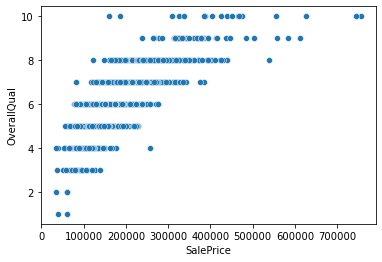

In [20]:
sns.scatterplot(x = saleprice, y = overallquality, data = df);
overallqualityresults = scipy.stats.linregress(overallquality, saleprice)
print(overallqualityresults.rvalue)
print(overallqualityresults.pvalue)

### Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

In [21]:
df["TotalArea"] = df["TotalBsmtSF"] + df["GrLivArea"] + df["GarageArea"]+ df["WoodDeckSF"] + df["OpenPorchSF"]+ df["EnclosedPorch"]+ df["3SsnPorch"]+df["ScreenPorch"]+ df["PoolArea"]

0.8077042407242586
0.0


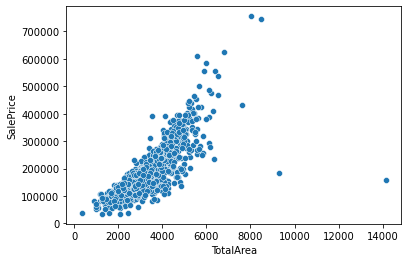

In [22]:
totalarea = df["TotalArea"]
sns.scatterplot(x = totalarea, y = saleprice, data = df);
totalarearesult = scipy.stats.linregress(totalarea, saleprice)
print(totalarearesult.rvalue)
print(totalarearesult.pvalue)

### Using the dependent variable, perform both min-max and standard scaling in Python.

In [31]:
#Standard Scaling
scaler = StandardScaler()
t = np.asarray(df["SalePrice"])
t = t.reshape(-1,1)
scaled_data = scaler.fit_transform(t)
print(scaled_data.mean())
print(scaled_data.std())

1.3626846987180004e-16
0.9999999999999998


In [33]:
#Min-Max Scaling
scaler = MinMaxScaler()
min_max_scaled = scaler.fit_transform(t)
print(min_max_scaled.min())
print(min_max_scaled.max())

0.0
1.0
